# Low-pass filter

## Importing data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import API_tools as api 
from datetime import datetime
import pandas as pd

data = api.load_csv("linkoping2_NO.csv")
data = data["NO"]
freq = '15min'
data = data.resample(freq).mean()
data = data.interpolate()

print(data)
print(data.to_numpy().flatten())

2025-03-01 00:00:00    11.081392
2025-03-01 00:15:00     8.968090
2025-03-01 00:30:00     8.804863
2025-03-01 00:45:00     9.616592
2025-03-01 01:00:00     8.673157
                         ...    
2025-06-24 22:45:00     1.840802
2025-06-24 23:00:00     2.961830
2025-06-24 23:15:00     3.168597
2025-06-24 23:30:00     3.791576
2025-06-24 23:45:00     3.917098
Freq: 15min, Name: NO, Length: 11136, dtype: float64
[11.08139171  8.96808951  8.80486269 ...  3.16859711  3.7915762
  3.91709753]


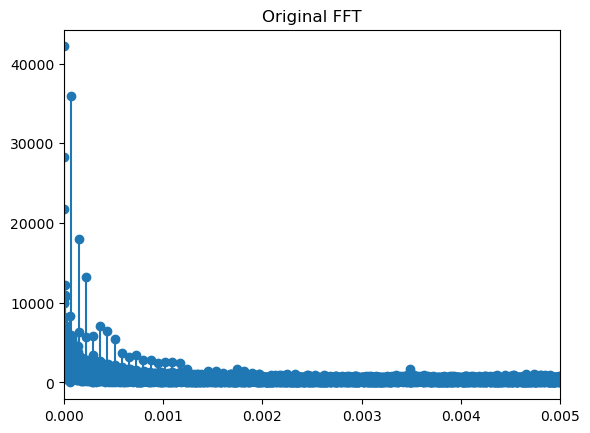

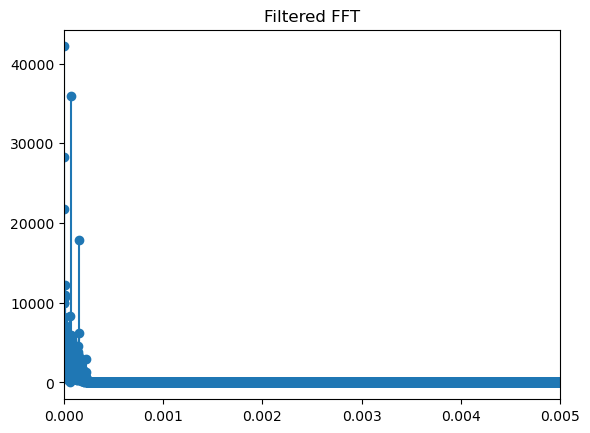

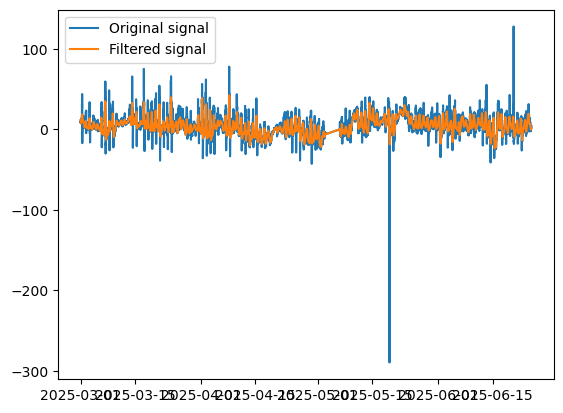

In [10]:
import scipy

dates = data.index

array = data.to_numpy().flatten()
fs = 1/(15*60)
N = len(array)
n = np.arange(N)

Y = np.fft.fft(array)

plt.figure(0)
plt.stem(2*np.pi*fs*n/N,np.abs(Y),basefmt="")
plt.xlim(0,0.005)
plt.title("Original FFT")

cutoff = 0.0002
Wn = cutoff/(2*np.pi)/(fs/2)

b, a = scipy.signal.butter(7,Wn,btype='low')

yf = scipy.signal.filtfilt(b, a, array)

YF = np.fft.fft(yf)

plt.figure(1)
plt.stem(2*np.pi*fs*n/N,np.abs(YF),basefmt="")
plt.xlim(0,0.005)
plt.title("Filtered FFT")

plt.figure(2)
plt.plot(dates, array, label="Original signal")
plt.plot(dates, yf, label="Filtered signal")
plt.legend()

# Trying out Welch's method

<StemContainer object of 3 artists>

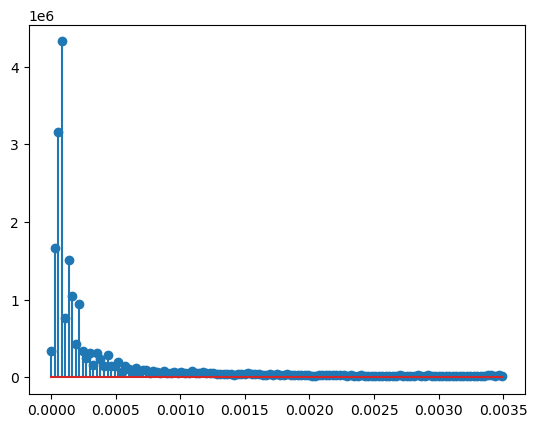

In [9]:
from scipy.signal import welch

f, psd = welch(array, fs, window='hamming', nperseg=256, noverlap=128)
plt.stem(f*2*np.pi,psd)